In [1]:
pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing libraries for our purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\99299\OneDrive\Desktop\Desktop\test jupyter\original_netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploring the dataset

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

# Dealing with missing values 

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [8]:
# Number of unique values in director column 

df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [9]:
# Number of moives or shows director by given director
df.groupby('director')['title'].count().sort_values()

director
Jesse Warn                                            1
Lucy van Beek                                         1
Ludovic Bernard                                       1
Ludovico Di Martino                                   1
Luis Alberto Restrepo, Andrés Beltrán, Jaime Rayo     1
                                                     ..
Jay Karas                                            14
Marcus Raboy                                         16
Suhas Kadav                                          16
Raúl Campos, Jan Suter                               18
Rajiv Chilaka                                        19
Name: title, Length: 4528, dtype: int64

In [10]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
# Unnested the Cast_column 
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head(9)

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima


In [12]:
# Unnested the Cast_column 
constraints2 = df['cast'].apply(lambda x: str(x).split(',')).tolist()
df_new2 = pd.DataFrame(constraints2, index = df['title'])
df_new2 = df_new2.stack()
df_new2 = pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace = True)
df_new2.drop(['level_1'], axis =1, inplace =True)
df_new2

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [13]:
# Unnested the coountry column
constraints3 = df['country'].apply(lambda x: str(x).split(',')).tolist()
df_new3 = pd.DataFrame(constraints3, index = df['title'])
df_new3 = df_new3.stack()
df_new3 = pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'country'},inplace = True)
df_new3.drop(['level_1'], axis =1, inplace =True)
df_new3

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


In [14]:
# Unnested the list_in column
constraints4 = df['listed_in'].apply(lambda x: str(x).split(',')).tolist()
df_new4 = pd.DataFrame(constraints4, index = df['title'])
df_new4 = df_new4.stack()
df_new4 = pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'listed_in'},inplace = True)
df_new4.drop(['level_1'], axis =1, inplace =True)
df_new4

df_l = df_new3.merge(df_new4, on = 'title')
df_l

,title,country,listed_in
0,Dick Johnson Is Dead,United States,Documentaries
1,Blood & Water,South Africa,International TV Shows
2,Blood & Water,South Africa,TV Dramas
3,Blood & Water,South Africa,TV Mysteries
4,Ganglands,nan,Crime TV Shows
...,...,...,...
23759,Zoom,United States,Children & Family Movies
23760,Zoom,United States,Comedies
23761,Zubaan,India,Dramas
23762,Zubaan,India,International Movies


In [15]:
# Merging the unnested director data to unnested actor data
df_new = df_new1.merge(df_new2, on = 'title')
df_c = df_new.merge(df_l, on = 'title')
df_c

,title,Directors,Actors,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [16]:
#merging the unnested data to old nested data
df_final = df_c.merge(df[['show_id','type','title','date_added','release_year','rating','duration' ]], on = 'title', how='left')

In [17]:
# again check null
df_final.isnull().sum()

title             0
Directors         0
Actors            0
country           0
listed_in         0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [18]:
df_final

,title,Directors,Actors,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [19]:
du_nul = df_final[df_final['duration'].isna()]
du_nul

,title,Directors,Actors,country,listed_in,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,"August 15, 2016",2015,66 min,NaN


In [20]:
df_final.loc[df_final['duration'].isnull(),'duration'] = df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
# now we are done with the rating and duration column.

In [21]:
#just an attempt to observe nulls in date_added column
df_final['date_added'].isnull().sum()
df_final[df_final['date_added'].isnull()].head()

,title,Directors,Actors,country,listed_in,show_id,type,date_added,release_year,rating,duration
136940,A Young Doctor's Notebook and Other Stories,nan,Daniel Radcliffe,United Kingdom,British TV Shows,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136941,A Young Doctor's Notebook and Other Stories,nan,Daniel Radcliffe,United Kingdom,TV Comedies,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136942,A Young Doctor's Notebook and Other Stories,nan,Daniel Radcliffe,United Kingdom,TV Dramas,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136943,A Young Doctor's Notebook and Other Stories,nan,Jon Hamm,United Kingdom,British TV Shows,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136944,A Young Doctor's Notebook and Other Stories,nan,Jon Hamm,United Kingdom,TV Comedies,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [22]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [23]:
for i in df_final[df_final['country'].isnull()]['Directors'].unique():
  if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
    imp=df_final[df_final['Directors']==i]['country'].mode().values[0]
    df_final.loc[df_final['Directors']==i,'country']=df_final.loc[df_final['Directors']==i,'country'].fillna(imp)

In [24]:
#removing mins from data
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

,title,Directors,Actors,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [25]:
df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()

In [26]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

,title,Directors,Actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


# Visualizing data

C:\Users\99299\AppData\Local\Temp\ipykernel_19840\3623998193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final1['duration_copy'], hist=True, kde=True,bins=int(36), color = 'darkblue')


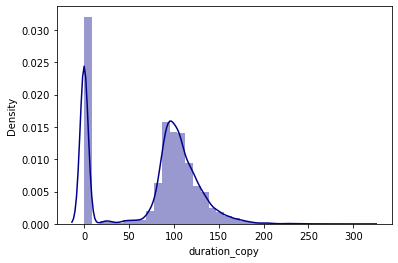

In [27]:
sns.distplot(df_final1['duration_copy'], hist=True, kde=True,bins=int(36), color = 'darkblue')
plt.show()

C:\Users\99299\AppData\Local\Temp\ipykernel_19840\3623998193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final1['duration_copy'], hist=True, kde=True,bins=int(36), color = 'darkblue')


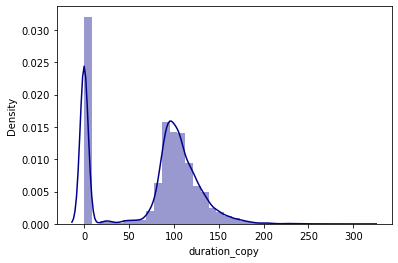

In [28]:
sns.distplot(df_final1['duration_copy'], hist=True, kde=True,bins=int(36), color = 'darkblue')
plt.show()

In [29]:
'''bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)
'''
df_final1.head()

,title,Directors,Actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


# Univariate Analysis in terms of counts of each column

In [30]:
df_final1 = df_final1.rename(columns = {'listed_in': 'genre'})

In [31]:
#number of distinct titles on the basis of genre
df_genre=df_final1.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_genre

,genre,title
13,International Movies,2624
49,Dramas,1600
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829
9,Dramas,827
53,International TV Shows,774
12,Independent Movies,736
30,TV Dramas,696
20,Romantic Movies,613


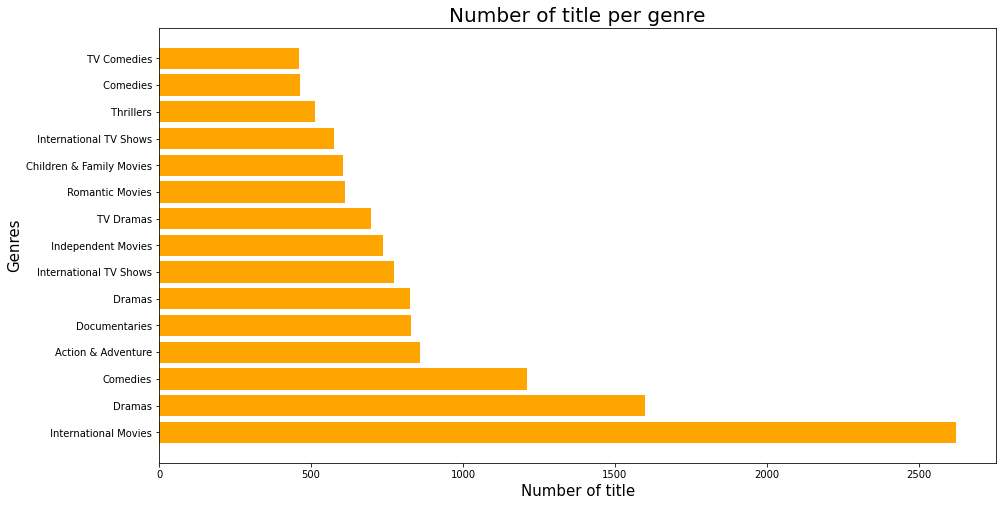

In [32]:
plt.figure(figsize=(15,8))
plt.barh(df_genre[::]['genre'], df_genre[::]['title'],color=['orange'])
plt.xlabel('Number of title',size = 15)
plt.ylabel('Genres',size = 15)
plt.title("Number of title per genre", size = 20)
plt.show()

In [33]:
#number of distinct titles on the basis of type
df_type = df_final1.groupby(['type']).agg({"title":"nunique"})
df_type

,title
type,
Movie,6131
TV Show,2676


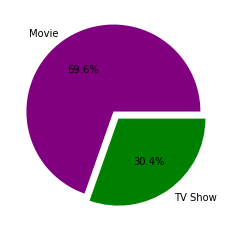

In [34]:
 df_type=df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
 plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['purple','green'],autopct='%.1f%%')
 plt.show()

In [35]:
df_final1['country'] = df_final1['country'].str.replace(',', '')
df_final1.head()

,title,Directors,Actors,country,genre,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [36]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,7
Afghanistan,1
Albania,1
Algeria,3
Angola,1
...,...
Venezuela,2
Vietnam,7
West Germany,1


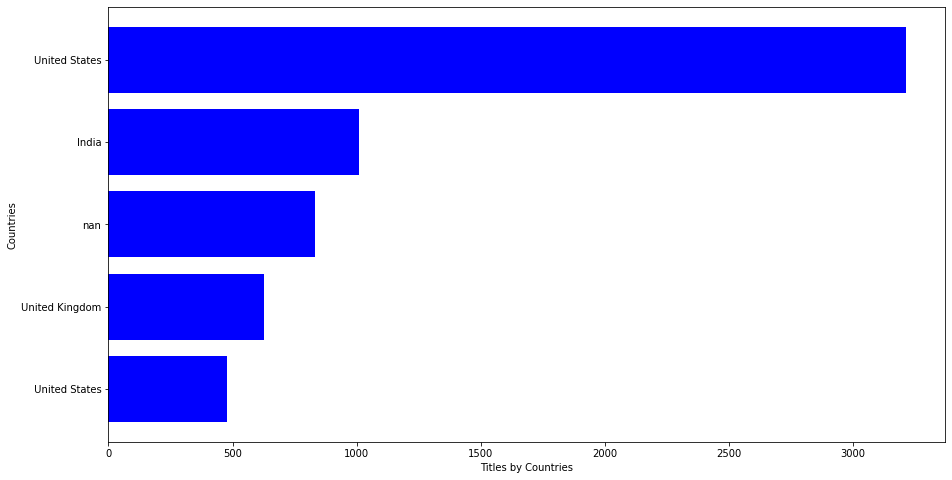

In [37]:
df_country=df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

In [38]:
#number of distinct titles on the basis of rating
df_final1.groupby(['rating']).agg({"title":"nunique"})

,title
rating,
G,41
NC-17,3
NR,87
PG,287
PG-13,490
R,799
TV-14,2160
TV-G,220
TV-MA,3207


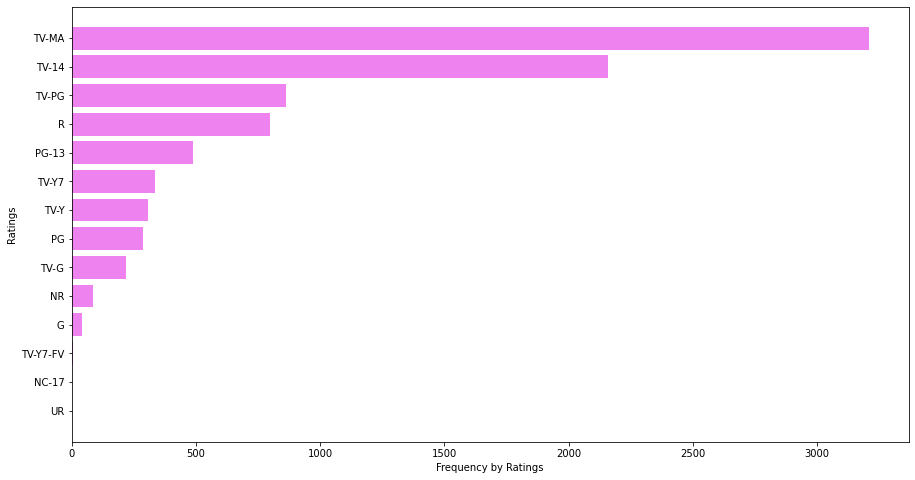

In [39]:
df_rating=df_final1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

In [40]:
#number of distinct titles on the basis of duration
df_final1.groupby(['duration']).agg({"title":"nunique"})

,title
duration,
1 Season,1793
10,1
10 Seasons,7
100,108
101,116
...,...
95,137
96,130
97,146


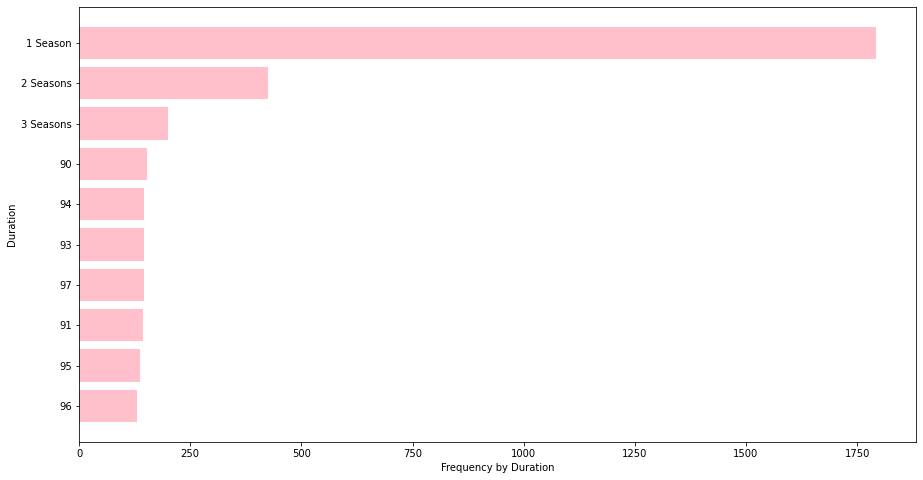

In [41]:
df_duration=df_final1.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

In [42]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['Actors']).agg({"title":"nunique"})

,title
Actors,
Jr.,2
"""Riley"" Lakdhar Dridi",1
'Najite Dede,1
2 Chainz,1
2Mex,1
...,...
İbrahim Büyükak,1
İbrahim Çelikkol,1
Şahin Irmak,1


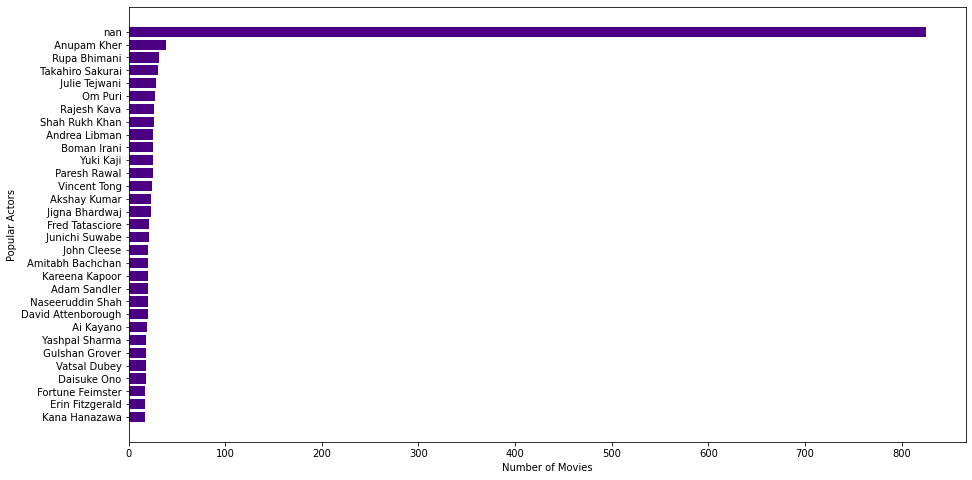

In [43]:
df_actors=df_final1.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

In [44]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['Directors']).agg({"title":"nunique"})

,title
Directors,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1
...,...
Éric Warin,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


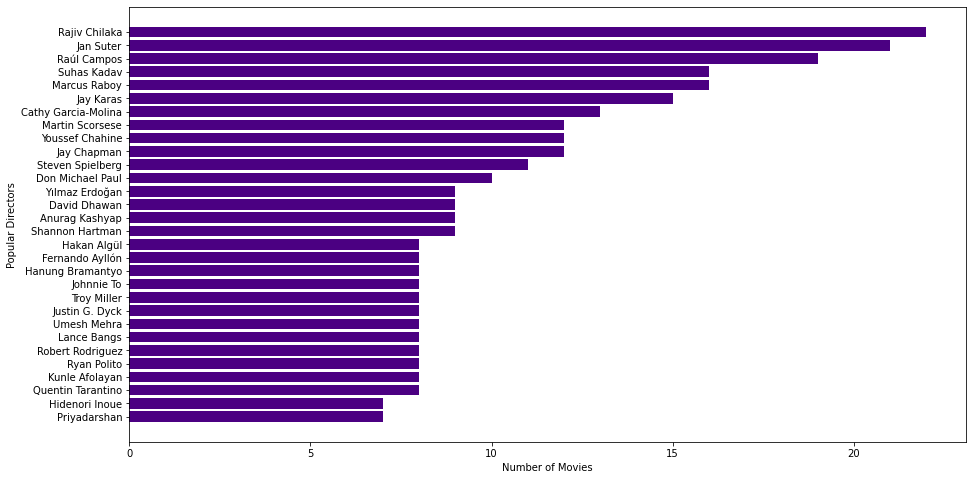

In [45]:
df_directors=df_final1.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [46]:
#number of distinct titles on the basis of year
df_final1.groupby(['release_year']).agg({"title":"nunique"})

,title
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1032
2018,1147
2019,1030


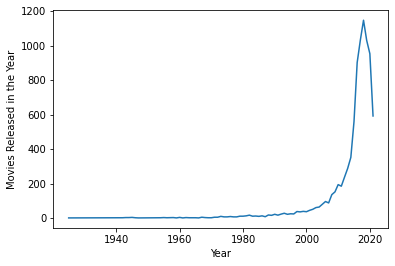

In [47]:
df_year=df_final1.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In [51]:
df_final1["date_added"] = df_final1["date_added"].apply(pd.to_datetime)
df_final1.dtypes

title                    object
Directors                object
Actors                   object
country                  object
genre                    object
show_id                  object
type                     object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
duration_copy             int32
dtype: object

In [54]:
df_final1['month_added'] = df_final1['date_added'].dt.month
df_final1

,title,Directors,Actors,country,genre,show_id,type,date_added,release_year,rating,duration,duration_copy,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,90,9
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,9
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,9
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,9
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111,111,3
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111,111,3
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111,111,3
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111,111,3


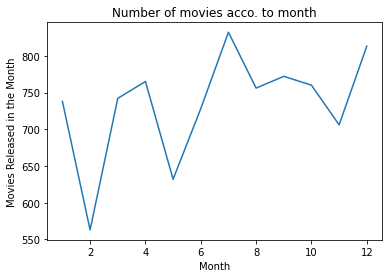

In [57]:
df_month=df_final1.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
figure
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.title('Number of movies acco. to month')
plt.show()

In [48]:
df_final

,title,Directors,Actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111,111
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111,111
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111,111
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111,111


#                Univariate Analysis separately for shows and movies


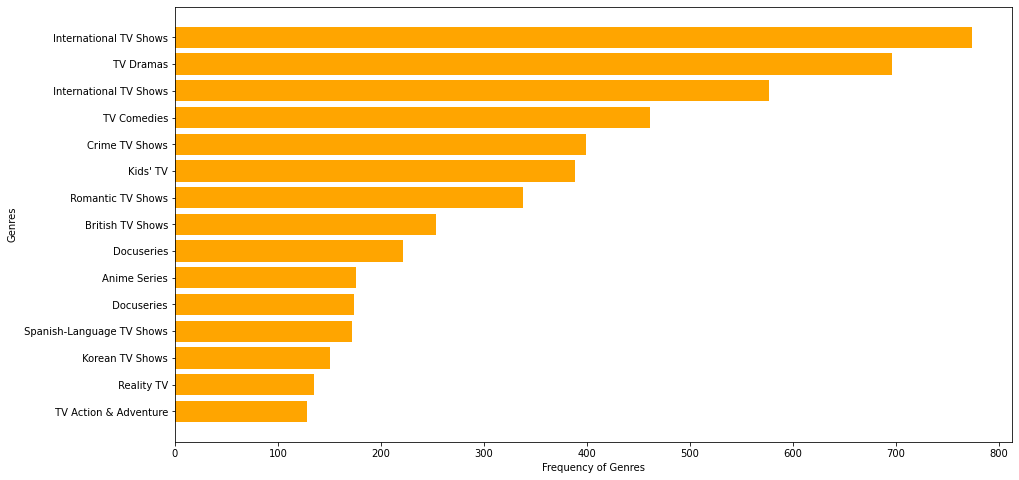

In [59]:
df_shows=df_final1[df_final1['type']=='TV Show']
df_movies=df_final1[df_final1['type']=='Movie']
df_genre=df_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

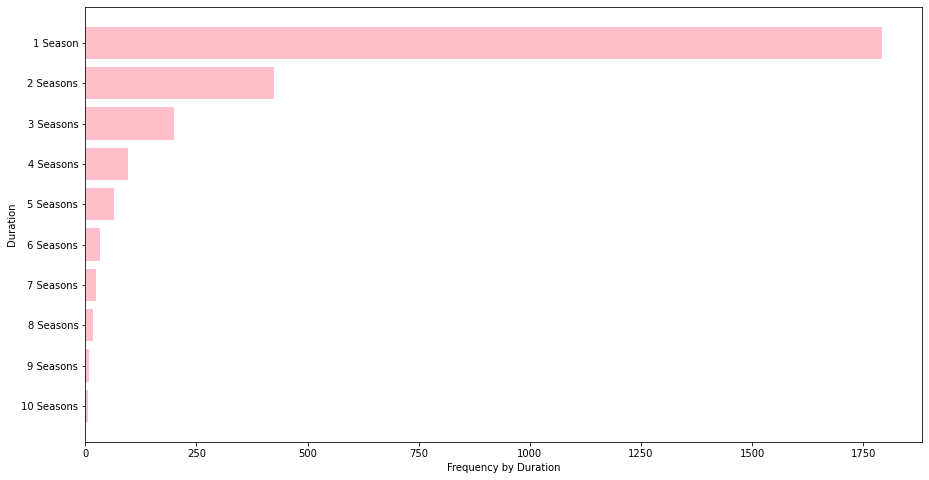

In [60]:
df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

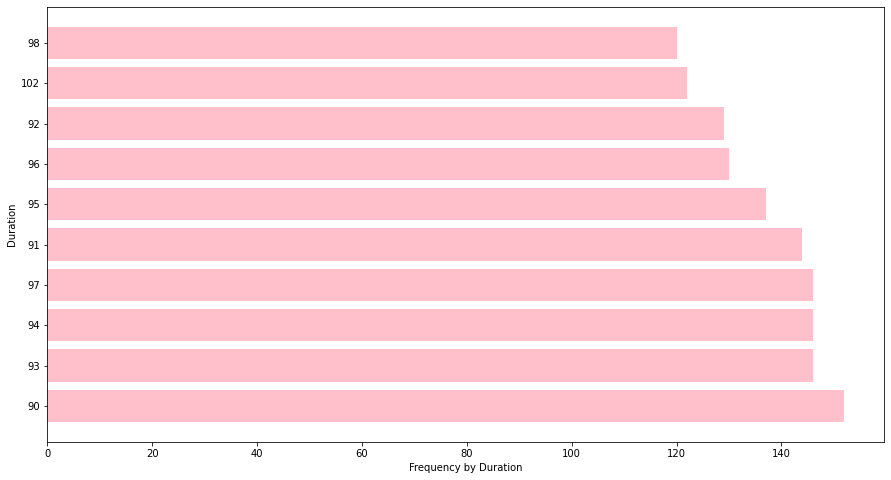

In [62]:
df_duration=df_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::]['duration'], df_duration[::]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

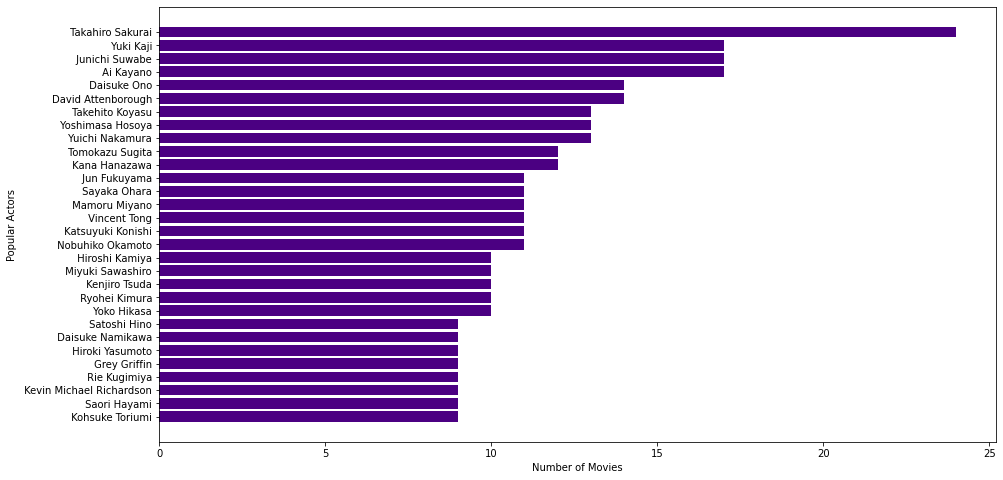

In [64]:
df_actors=df_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Actors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

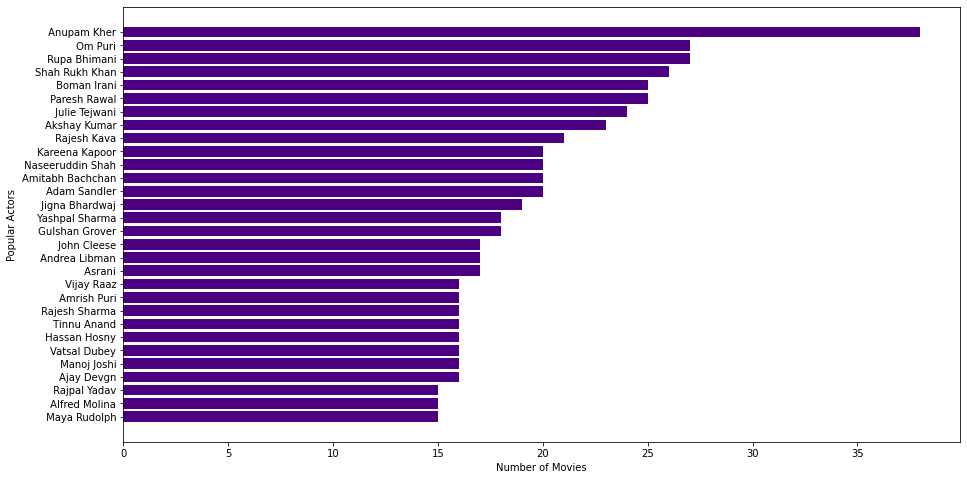

In [65]:
df_actors=df_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Actors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

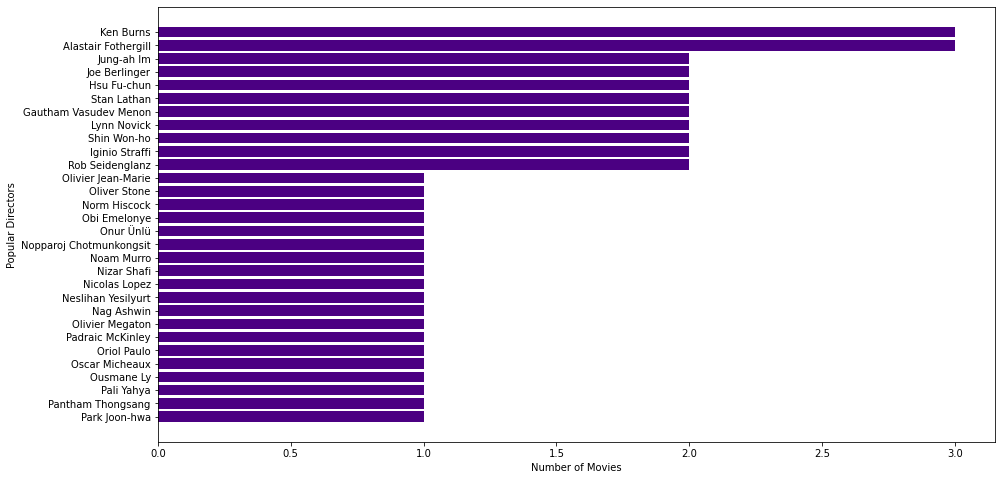

In [66]:
df_directors=df_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

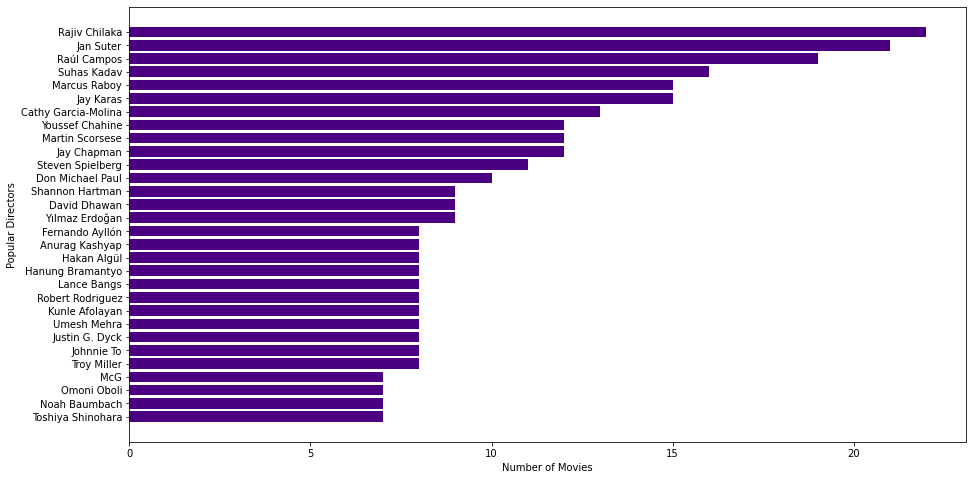

In [67]:
df_directors=df_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

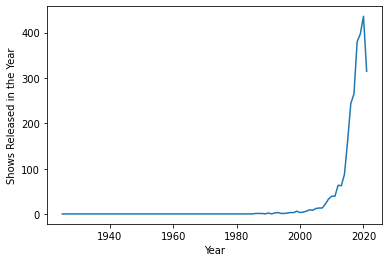

In [70]:
df_year=df_shows.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

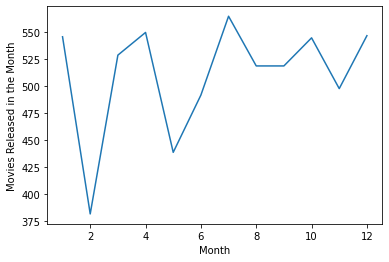

In [71]:
df_month=df_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

# Univariate Analysis separately for shows and movies in USA


In [72]:
#Analyzing USA for both shows and movies
df_usa_shows=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='TV Show']
df_usa_movies=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='Movie']

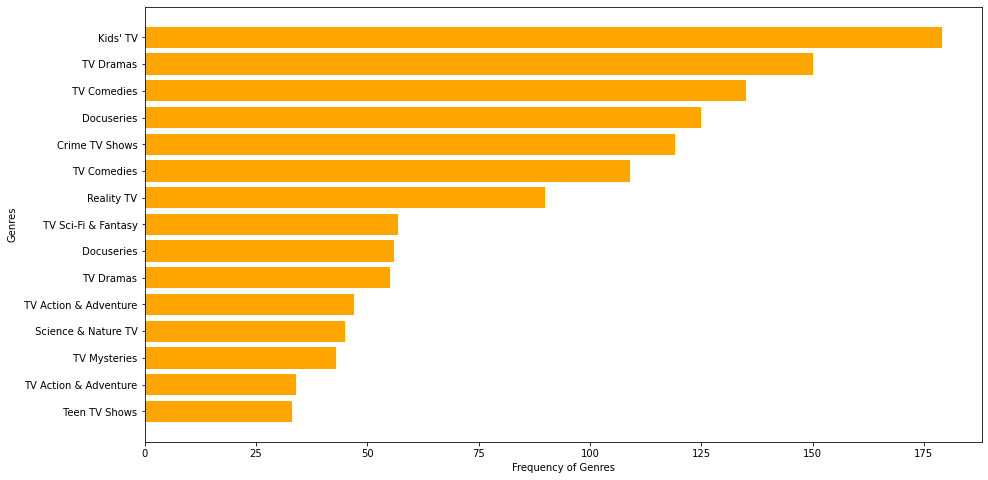

In [74]:
df_genre=df_usa_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

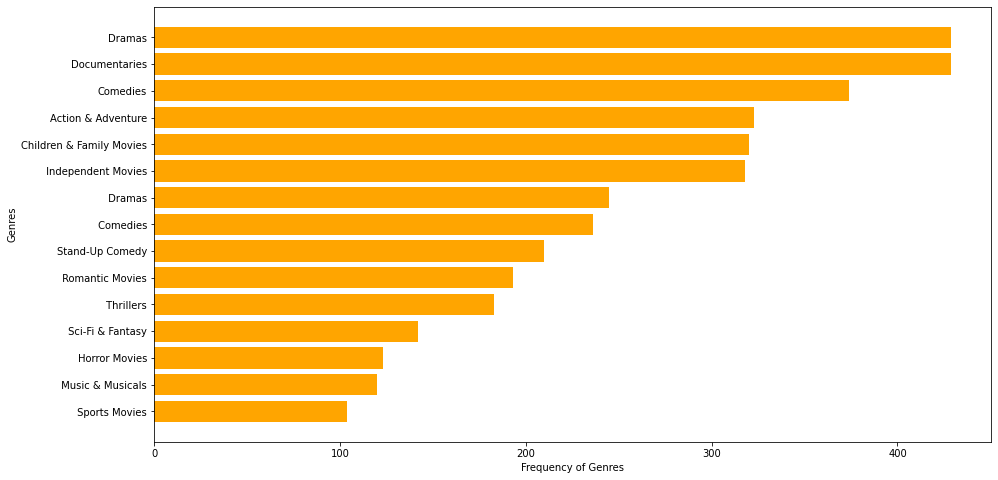

In [75]:
df_genre=df_usa_movies.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

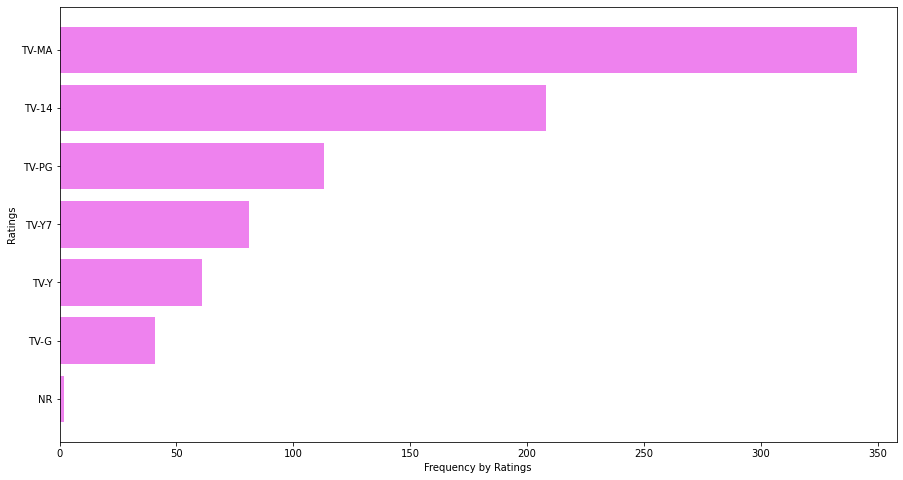

In [76]:
df_rating=df_usa_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

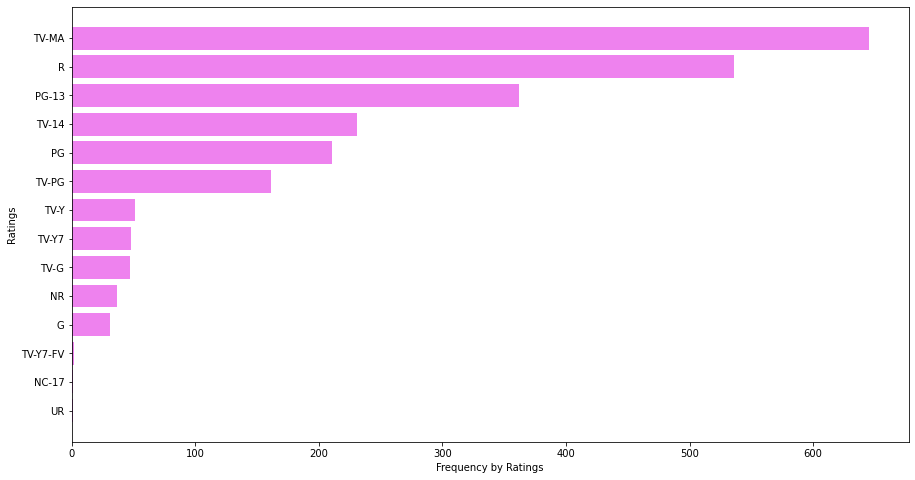

In [77]:
df_rating=df_usa_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

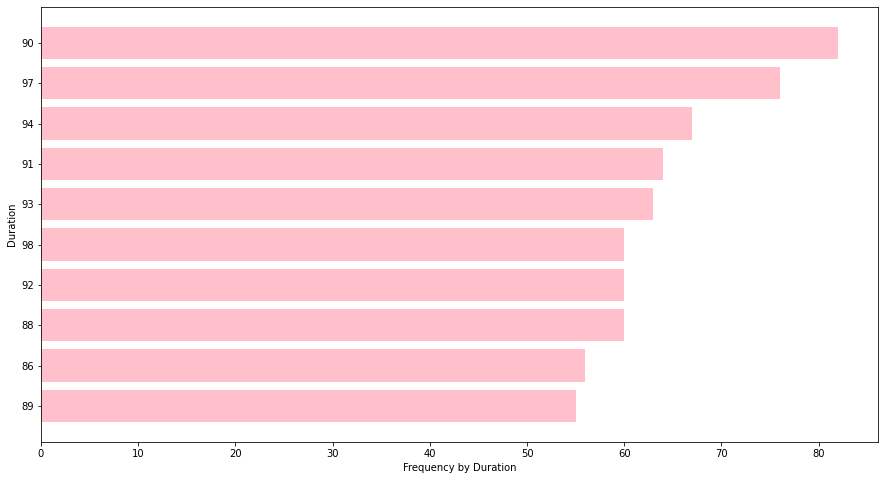

In [78]:
df_duration=df_usa_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

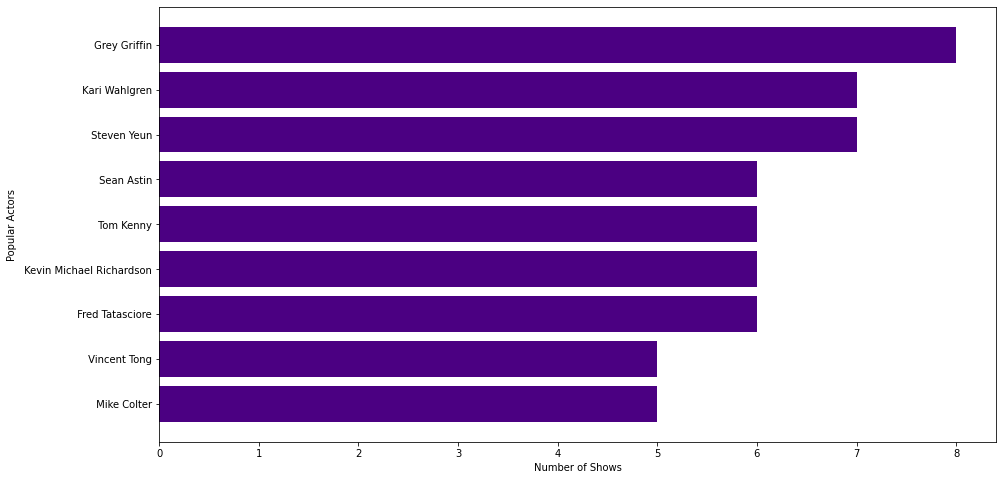

In [80]:
df_actors=df_usa_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

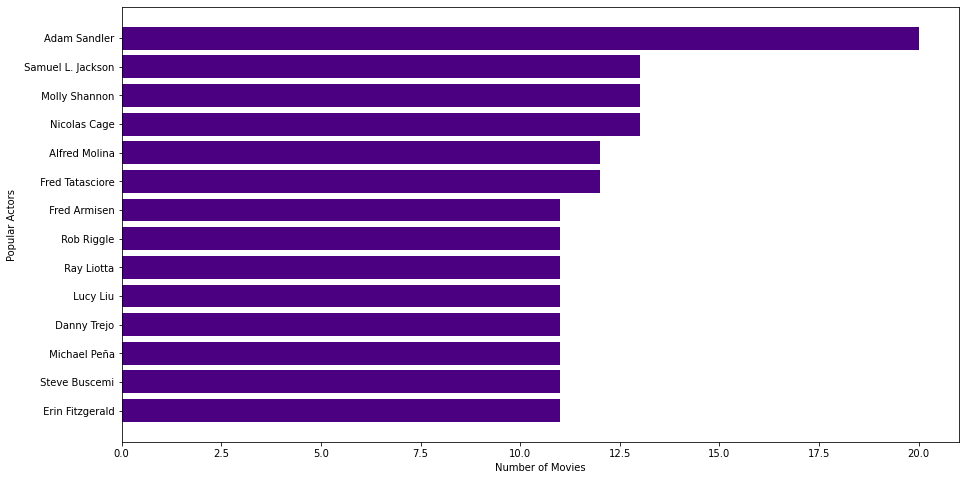

In [81]:
df_actors=df_usa_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['Actors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

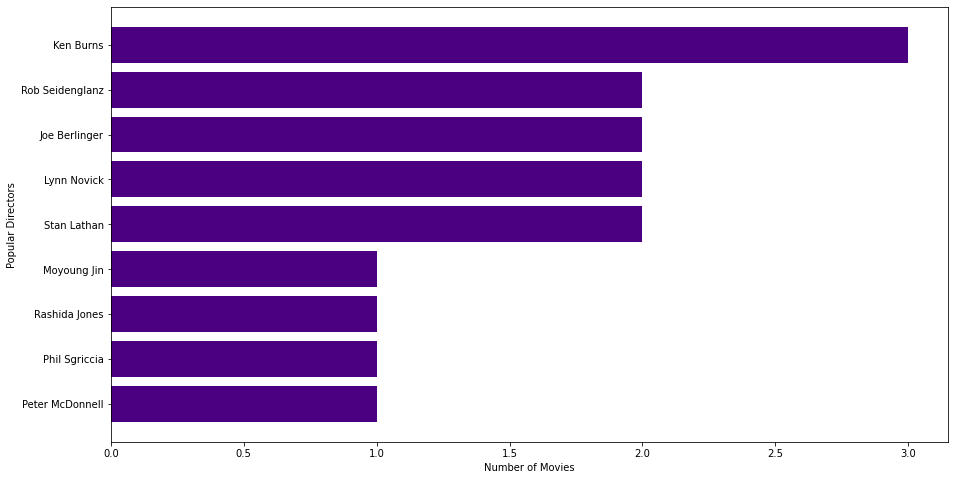

In [82]:
df_directors=df_usa_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

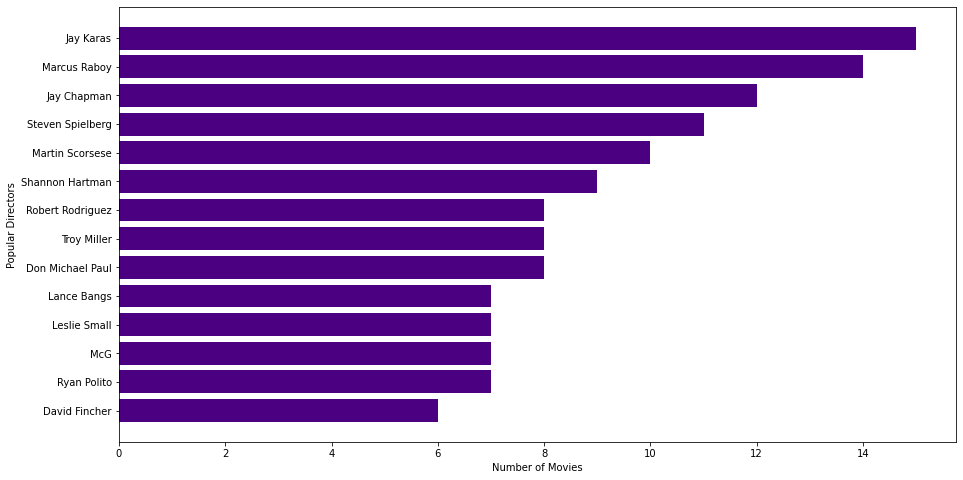

In [83]:
df_directors=df_usa_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['Directors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [88]:
#below countries will be analyzed for both shows and movies
shows_and_movies=['United States','India','United Kingdom']
#below countries will be only analyzed on basis of shows
only_shows=['Japan','South Korea']

['Japan', 'South Korea']

# Univariate Analysis separately for shows and movies in USA

In [89]:
#Analyzing USA for both shows and movies
df_usa_shows=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='TV Show']
df_usa_movies=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='Movie']

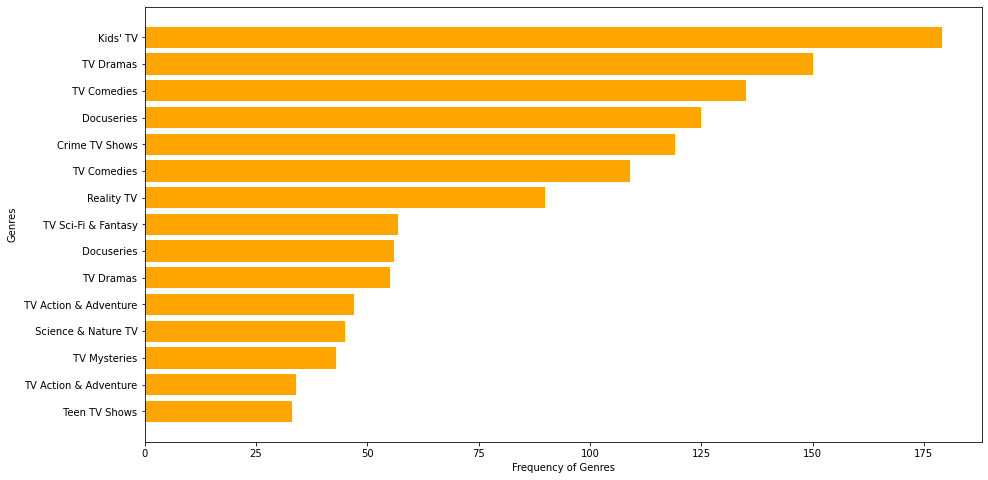

In [93]:
df_genre=df_usa_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()
### Dramas,Comedy, Kids 'TV Shows, International TV Shows and Docuseries, Genres are popular in TV Series in USA

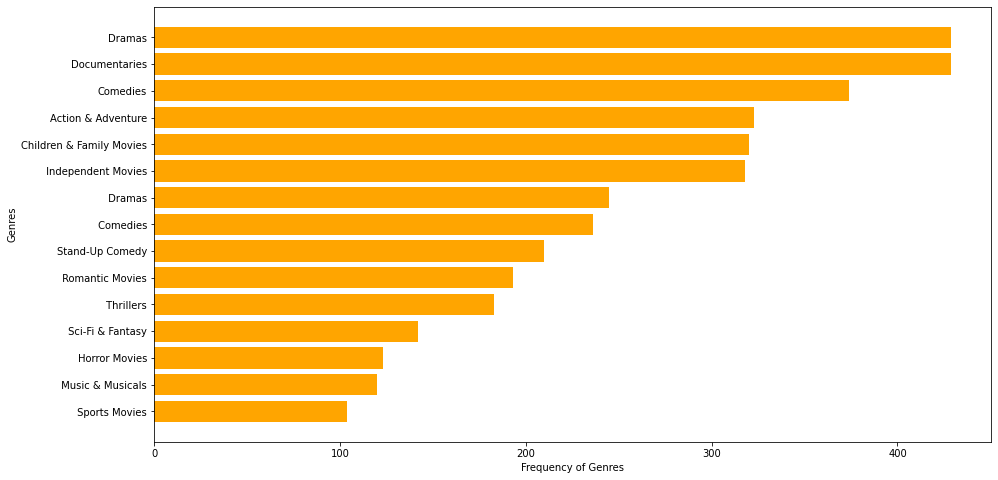

In [94]:
df_genre=df_usa_movies.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()
#Dramas,Comedy, Documentaries, Family Movies and Action Genres in Movies are popular in USA

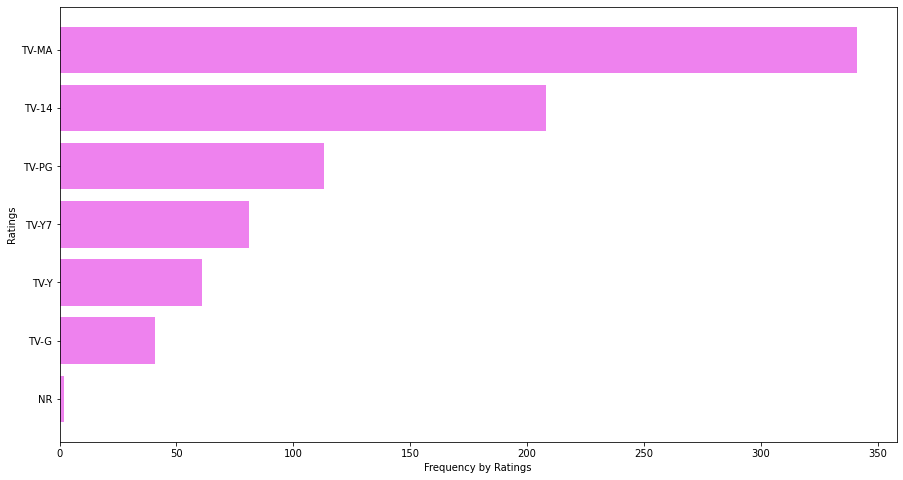

In [95]:
df_rating=df_usa_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

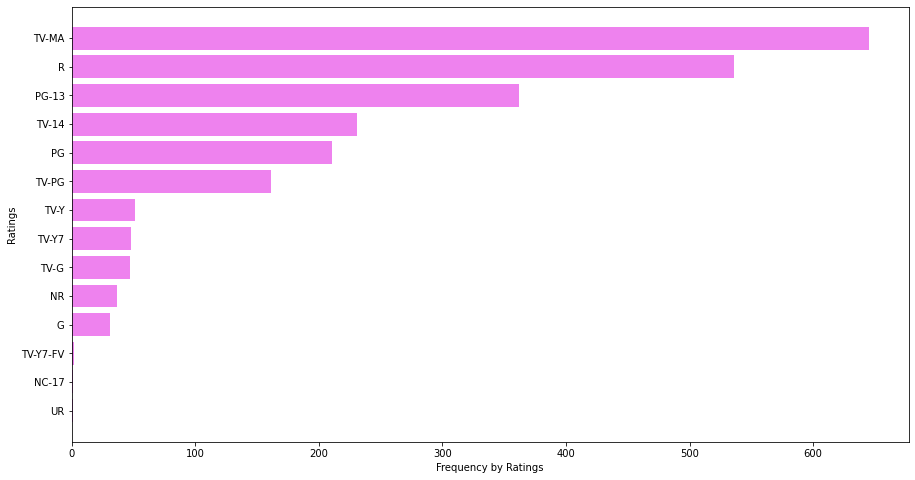

In [97]:
df_rating=df_usa_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()
# So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages in both Movies and TV Shows in USA

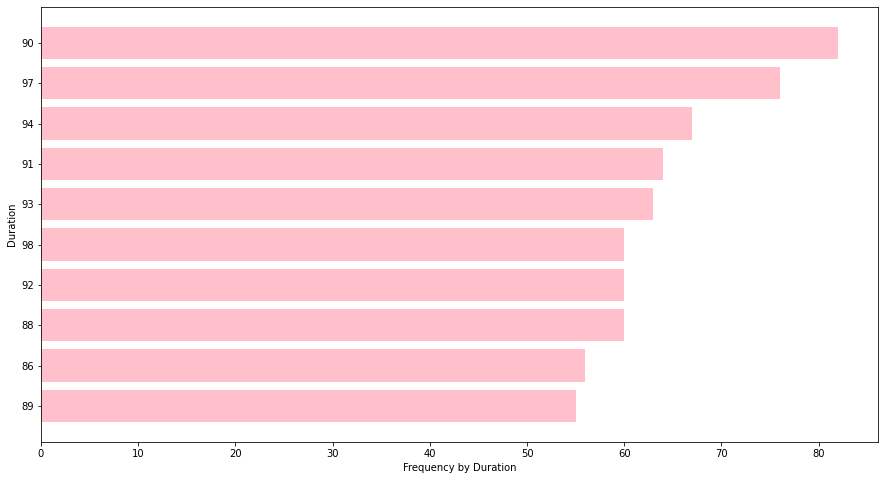

In [98]:
df_duration=df_usa_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()
# Across movies 80-100,100-120 is the ranges of minutes for which most movies lie. So quite possibly 80-120 mins is the sweet spot we would be wanting for movies in USA

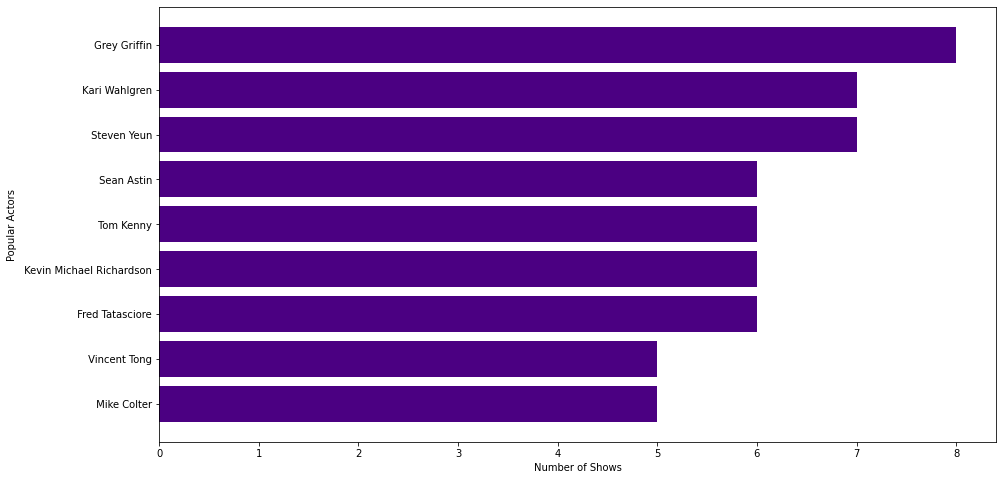

In [100]:
df_actors=df_usa_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()
#Vincent Tong,Grey Griffin and Kevin Richardson are the most popular actors across TV Shows in USA

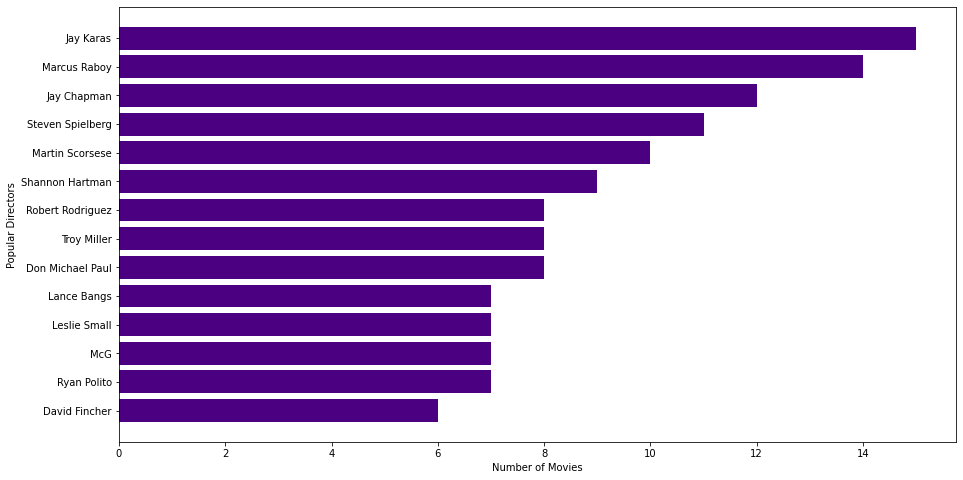

In [101]:
df_directors=df_usa_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['Directors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()
#Jay Karas,Marcus Raboy,Martin Scorcese and Jay Chapman are popular directors across movies in USA

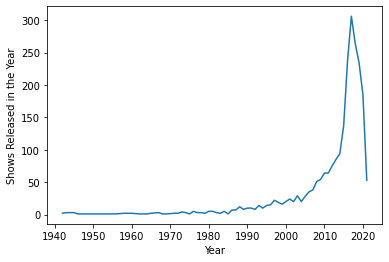

In [104]:
df_year=df_usa_movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()
#In USA, number of shows remained the same in 2021 as they were in 2020 while number of movies declined:

In [107]:
df_usa_movies.head()

,title,Directors,Actors,country,genre,show_id,type,date_added,release_year,rating,duration,duration_copy,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,90,9
179,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Dramas,s8,Movie,2021-09-24,1993,TV-MA,125,125,9
180,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Independent Movies,s8,Movie,2021-09-24,1993,TV-MA,125,125,9
181,Sankofa,Haile Gerima,Kofi Ghanaba,United States,International Movies,s8,Movie,2021-09-24,1993,TV-MA,125,125,9
197,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United States,Dramas,s8,Movie,2021-09-24,1993,TV-MA,125,125,9


In [110]:
#Analysing a combination of actors and directors
df_usa_movies['Actor_Director_Combination'] = df_usa_movies.Actors.str.cat(df_usa_movies.Directors, sep=' and ')
df_usa_movies_subset=df_usa_movies[df_usa_movies['Actors']!='nan']
df_usa_movies_subset=df_usa_movies_subset[df_usa_movies_subset['Directors']!='Unknown Director']
df_usa_movies_subset.head()

,title,Directors,Actors,country,genre,show_id,type,date_added,release_year,rating,duration,duration_copy,month_added,Actor_Director_Combination
179,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Dramas,s8,Movie,2021-09-24,1993,TV-MA,125,125,9,Kofi Ghanaba and Haile Gerima
180,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Independent Movies,s8,Movie,2021-09-24,1993,TV-MA,125,125,9,Kofi Ghanaba and Haile Gerima
181,Sankofa,Haile Gerima,Kofi Ghanaba,United States,International Movies,s8,Movie,2021-09-24,1993,TV-MA,125,125,9,Kofi Ghanaba and Haile Gerima
197,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United States,Dramas,s8,Movie,2021-09-24,1993,TV-MA,125,125,9,Oyafunmike Ogunlano and Haile Gerima
198,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United States,Independent Movies,s8,Movie,2021-09-24,1993,TV-MA,125,125,9,Oyafunmike Ogunlano and Haile Gerima


In [113]:
df_actors_directors[::-1]['Actor_Director_Combination'].values

array(['Marlon Wayans and Michael Tiddes',
       'Jeff Dunham and Michael Simon',
       'Harrison Ford and Steven Spielberg',
       ' Kate Higgins and William Lau', ' Rory Markham and Mike Gunther',
       'Robert De Niro and Martin Scorsese', ' Rene Naufahu and nan',
       ' Paul Schrier and nan', ' Felix Ryan and nan',
       ' Steven Skyler and nan', ' Najee De-Tiege and nan',
       ' Hector David Jr. and nan',
       ' Tabitha St. Germain and Ishi Rudell',
       'Kevin Hart and Leslie Small', ' Brittany Anne Pirtle and nan',
       ' Andrea Libman and Ishi Rudell', 'Alex Heartman and nan',
       ' Alexa PenaVega and Robert Rodriguez',
       ' Rebecca Shoichet and Ishi Rudell', ' Erika Fong and nan'],
      dtype=object)

#  Univariate Analysis separately for shows and movies in India
---



In [114]:
#Analyzing India for both shows and movies
df_india_shows=df_final1[df_final1['country']=='India'][df_final1[df_final1['country']=='India']['type']=='TV Show']
df_india_movies=df_final1[df_final1['country']=='India'][df_final1[df_final1['country']=='India']['type']=='Movie']

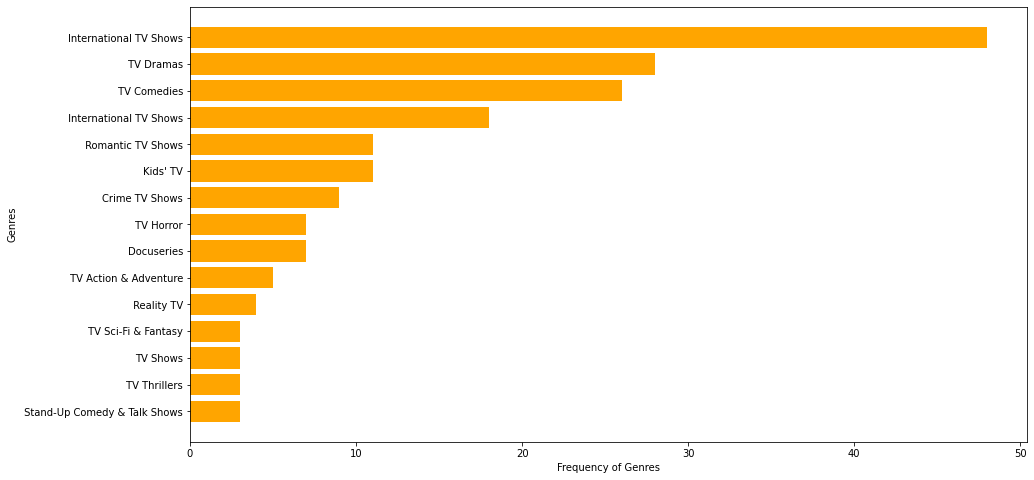

In [117]:
df_genre=df_india_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()
# Dramas,Comedy, Kids 'TV Shows and International TV Shows Genres are popular in TV Series in India

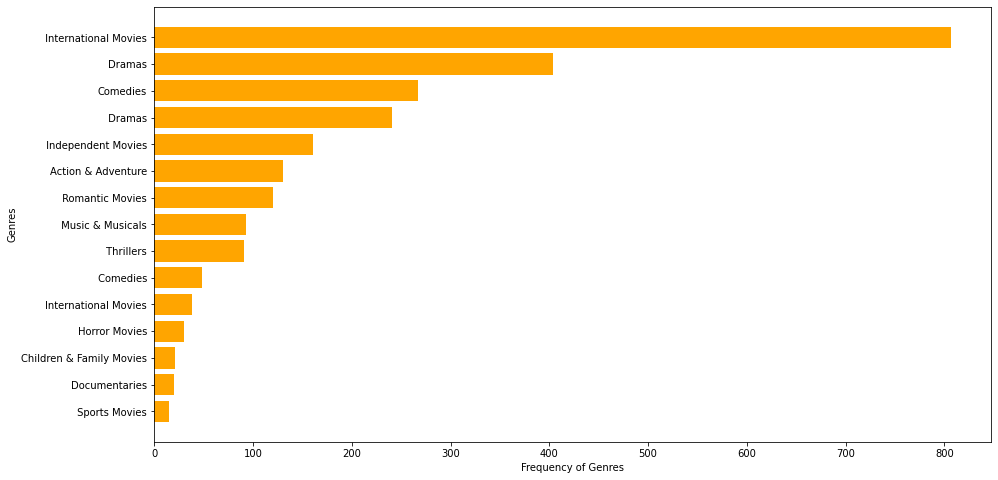

In [120]:
df_genre=df_india_movies.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()
#International Movies,Drama,Comedy,Indpeendent Movies and Action, Romance Genres are prevalent in India

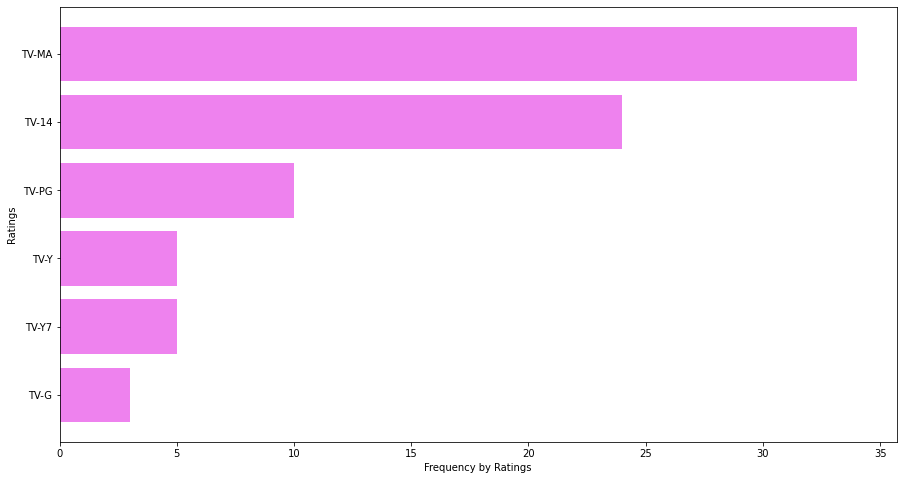

In [121]:
df_rating=df_india_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()


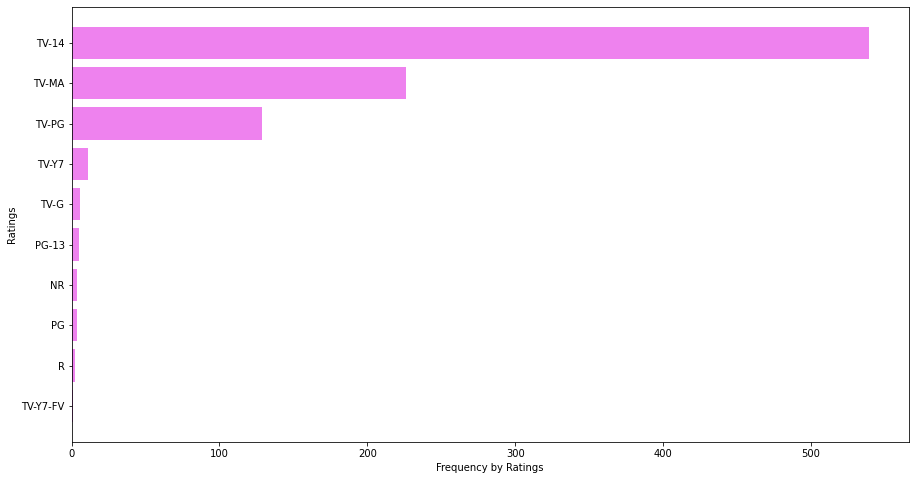

In [124]:
df_rating=df_india_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()
#So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences in TV Shows and those appropriate for people over 14 in Movies in India.
#Now this indeed seems to be the case. Indian TV Shows in Netflix are without a shadow of doubt intended for Mature Audiences while Movies for over 14 years of age.

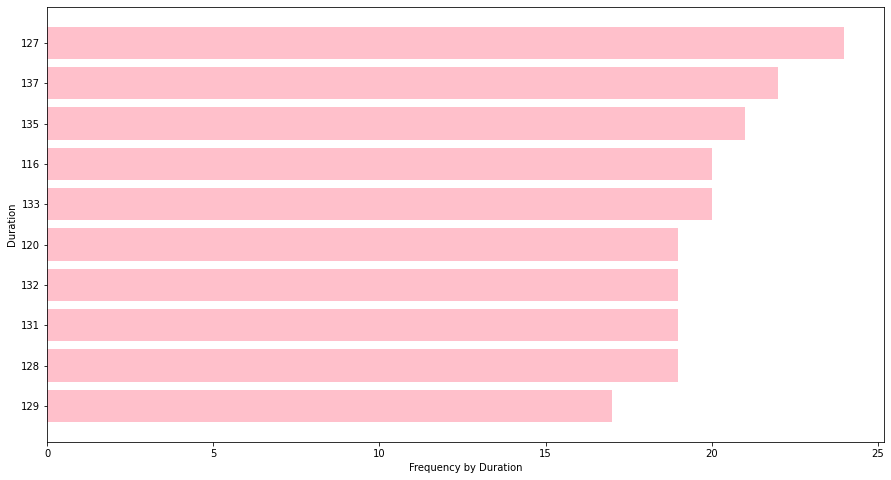

In [126]:
df_duration=df_india_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()
#Across movies ranges of minutes in India are comparatively greater than USA with a sweet spot at 120-150 mins.

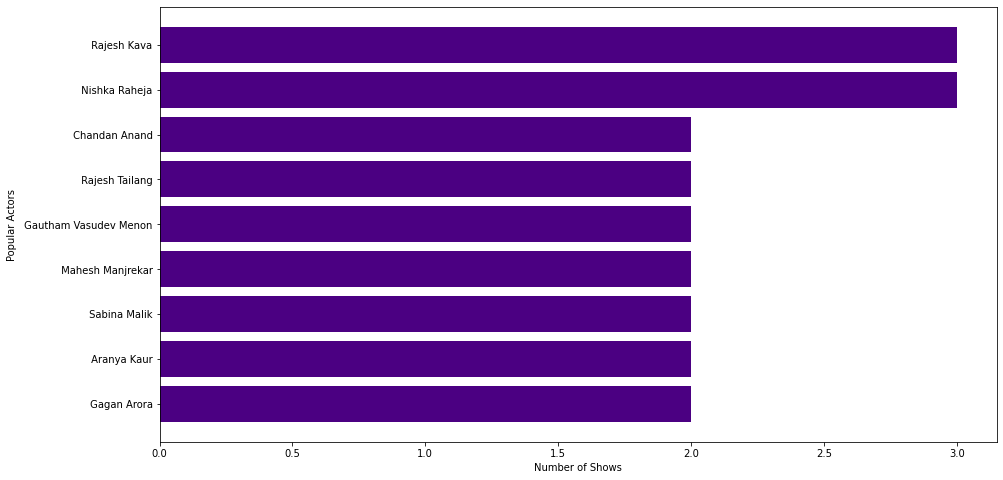

In [127]:
df_actors=df_india_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [128]:
df_actors['Actors'].values

array([' Rajesh Kava', ' Nishka Raheja', ' Chandan Anand',
       ' Rajesh Tailang', ' Gautham Vasudev Menon', ' Mahesh Manjrekar',
       ' Sabina Malik', ' Aranya Kaur', ' Gagan Arora'], dtype=object)

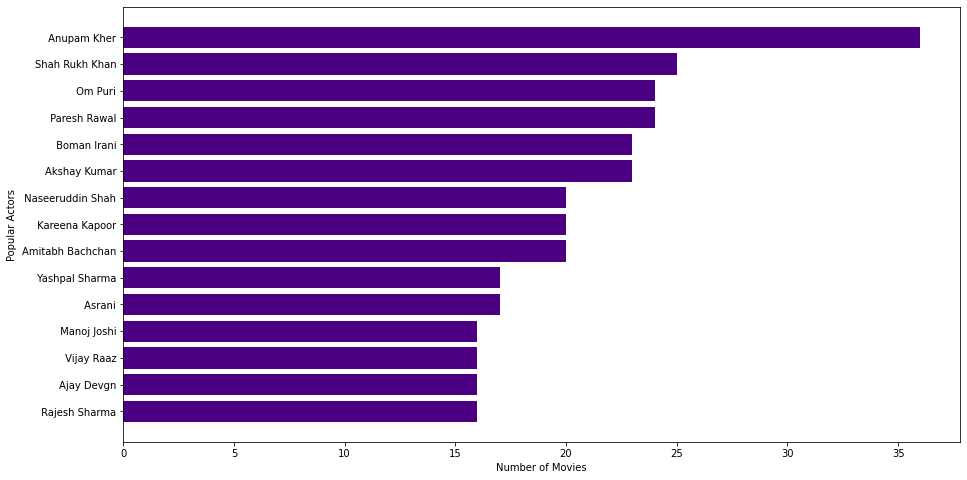

In [129]:
df_actors=df_india_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['Actors']!='nan']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

In [130]:
df_directors['Directors'].values

array(['Jay Karas', 'Marcus Raboy', 'Jay Chapman', 'Steven Spielberg',
       'Martin Scorsese', 'Shannon Hartman', 'Robert Rodriguez',
       'Troy Miller', 'Don Michael Paul', 'Lance Bangs', 'Leslie Small',
       'McG', 'Ryan Polito', 'David Fincher'], dtype=object)

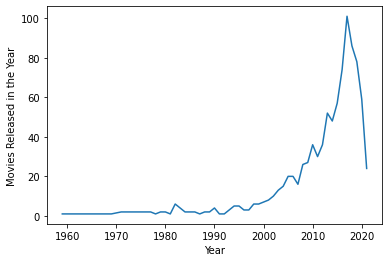

In [132]:
df_year=df_india_movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()
#In India,TV Shows were increasingly being added till 2020, though the addition of shows reduced in 2021.
#In India, Movies were increasingly added till 2018 but it has been a huge downhill since then. Now that's preposterous, since and soemthing has to be recommended to the Netflix Team with regards to that.

df_month=df_india_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

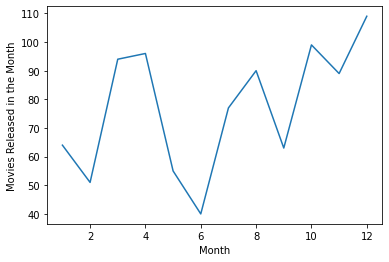

In [134]:
df_month=df_india_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in April in India

Movies are added in Netflix in India by a tremendous amount in first week/last month of current year and first month of next year

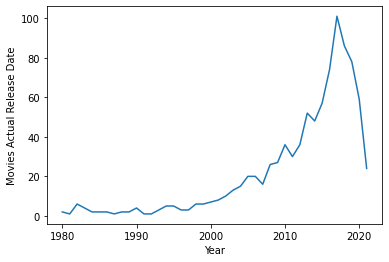

In [135]:
df_release_year=df_india_movies[df_india_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

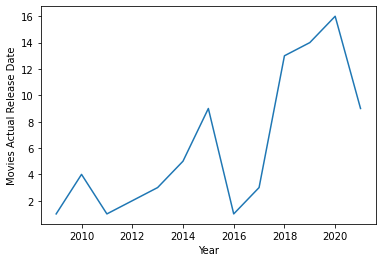

In [136]:
df_release_year=df_india_shows[df_india_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

The understandable trend amongs movies and TV Shows across India in Netflix is the reduction of movies after 2020

In [137]:
#Analysing a combination of actors and directors
df_india_movies['Actor_Director_Combination'] = df_india_movies.Actors.str.cat(df_india_movies.Directors, sep=' and ')
df_india_movies_subset=df_india_movies[df_india_movies['Actors']!='Unknown Actor']
df_india_movies_subset=df_india_movies_subset[df_india_movies_subset['Directors']!='Unknown Director']
df_india_movies_subset.head()

,title,Directors,Actors,country,genre,show_id,type,date_added,release_year,rating,duration,duration_copy,month_added,Actor_Director_Combination
641,Jeans,S. Shankar,Prashanth,India,Comedies,s25,Movie,2021-09-21,1998,TV-14,166,166,9,Prashanth and S. Shankar
642,Jeans,S. Shankar,Prashanth,India,International Movies,s25,Movie,2021-09-21,1998,TV-14,166,166,9,Prashanth and S. Shankar
643,Jeans,S. Shankar,Prashanth,India,Romantic Movies,s25,Movie,2021-09-21,1998,TV-14,166,166,9,Prashanth and S. Shankar
644,Jeans,S. Shankar,Aishwarya Rai Bachchan,India,Comedies,s25,Movie,2021-09-21,1998,TV-14,166,166,9,Aishwarya Rai Bachchan and S. Shankar
645,Jeans,S. Shankar,Aishwarya Rai Bachchan,India,International Movies,s25,Movie,2021-09-21,1998,TV-14,166,166,9,Aishwarya Rai Bachchan and S. Shankar


In [138]:
df_india_shows['Actor_Director_Combination'] = df_india_shows.Actors.str.cat(df_india_shows.Directors, sep=' and ')
df_india_shows_subset=df_india_shows[df_india_shows['Actors']!='Unknown Actor']
df_india_shows_subset=df_india_shows_subset[df_india_shows_subset['Directors']!='Unknown Director']
df_india_shows_subset.head()

,title,Directors,Actors,country,genre,show_id,type,date_added,release_year,rating,duration,duration_copy,month_added,Actor_Director_Combination
87,Kota Factory,nan,Mayur More,India,International TV Shows,s5,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,9,Mayur More and nan
88,Kota Factory,nan,Mayur More,India,Romantic TV Shows,s5,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,9,Mayur More and nan
89,Kota Factory,nan,Mayur More,India,TV Comedies,s5,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,9,Mayur More and nan
90,Kota Factory,nan,Jitendra Kumar,India,International TV Shows,s5,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,9,Jitendra Kumar and nan
91,Kota Factory,nan,Jitendra Kumar,India,Romantic TV Shows,s5,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,9,Jitendra Kumar and nan


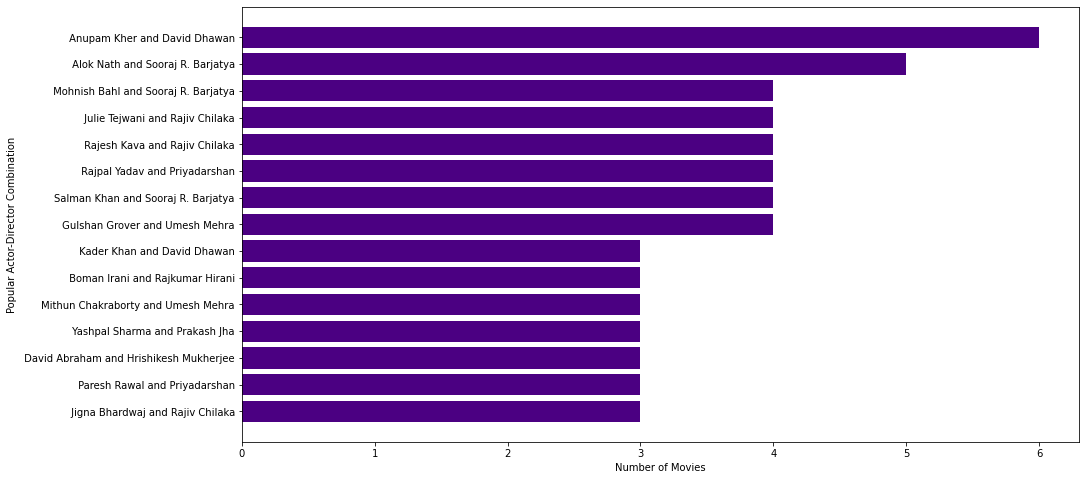

In [140]:
df_actors_directors=df_india_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [141]:
df_india_movies[df_india_movies['Directors']=='Rajiv Chilaka']

,title,Directors,Actors,country,genre,show_id,type,date_added,release_year,rating,duration,duration_copy,month_added,Actor_Director_Combination
10086,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,Vatsal Dubey,India,Children & Family Movies,s411,Movie,2021-07-22,2013,TV-Y7,64,64,7,Vatsal Dubey and Rajiv Chilaka
10087,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,Julie Tejwani,India,Children & Family Movies,s411,Movie,2021-07-22,2013,TV-Y7,64,64,7,Julie Tejwani and Rajiv Chilaka
10088,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,Rupa Bhimani,India,Children & Family Movies,s411,Movie,2021-07-22,2013,TV-Y7,64,64,7,Rupa Bhimani and Rajiv Chilaka
10089,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,Jigna Bhardwaj,India,Children & Family Movies,s411,Movie,2021-07-22,2013,TV-Y7,64,64,7,Jigna Bhardwaj and Rajiv Chilaka
10090,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,Rajesh Kava,India,Children & Family Movies,s411,Movie,2021-07-22,2013,TV-Y7,64,64,7,Rajesh Kava and Rajiv Chilaka
10091,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,Mousam,India,Children & Family Movies,s411,Movie,2021-07-22,2013,TV-Y7,64,64,7,Mousam and Rajiv Chilaka
10092,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,Swapnil,India,Children & Family Movies,s411,Movie,2021-07-22,2013,TV-Y7,64,64,7,Swapnil and Rajiv Chilaka
10121,Chhota Bheem aur Krishna,Rajiv Chilaka,Vatsal Dubey,India,Children & Family Movies,s416,Movie,2021-07-22,2009,TV-Y7,68,68,7,Vatsal Dubey and Rajiv Chilaka
10122,Chhota Bheem aur Krishna,Rajiv Chilaka,Julie Tejwani,India,Children & Family Movies,s416,Movie,2021-07-22,2009,TV-Y7,68,68,7,Julie Tejwani and Rajiv Chilaka
10123,Chhota Bheem aur Krishna,Rajiv Chilaka,Rupa Bhimani,India,Children & Family Movies,s416,Movie,2021-07-22,2009,TV-Y7,68,68,7,Rupa Bhimani and Rajiv Chilaka


It seems that Rajiv Chilaka has worked on Chota Bheem and has been able to create some good content in its movies. He can be relied on for more Chota Bheem stories

In [142]:
df_actors_directors['Actor_Director_Combination'].values

array([' Anupam Kher and David Dhawan',
       ' Alok Nath and Sooraj R. Barjatya',
       ' Mohnish Bahl and Sooraj R. Barjatya',
       ' Julie Tejwani and Rajiv Chilaka',
       ' Rajesh Kava and Rajiv Chilaka', ' Rajpal Yadav and Priyadarshan',
       'Salman Khan and Sooraj R. Barjatya',
       ' Gulshan Grover and Umesh Mehra', ' Kader Khan and David Dhawan',
       ' Boman Irani and Rajkumar Hirani',
       'Mithun Chakraborty and Umesh Mehra',
       ' Yashpal Sharma and Prakash Jha',
       ' David Abraham and Hrishikesh Mukherjee',
       ' Paresh Rawal and Priyadarshan',
       ' Jigna Bhardwaj and Rajiv Chilaka'], dtype=object)

#  Univariate Analysis separately for shows in Japan
---



In [143]:
#Analyzing India for both shows and movies
df_japan_shows=df_final1[df_final1['country']=='Japan'][df_final1[df_final1['country']=='Japan']['type']=='TV Show']

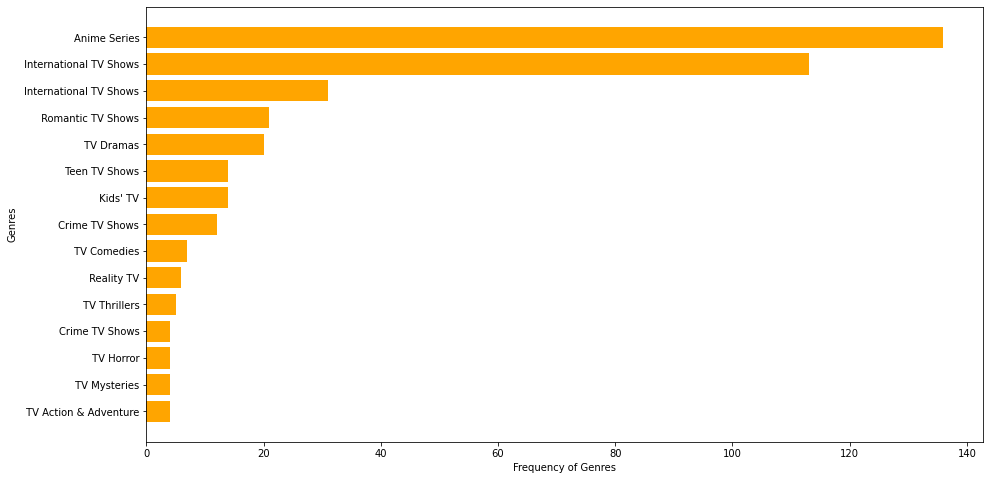

In [145]:
df_genre=df_japan_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

    International TV Shows and Anime Genres are popular in TV Shows in Japan
   

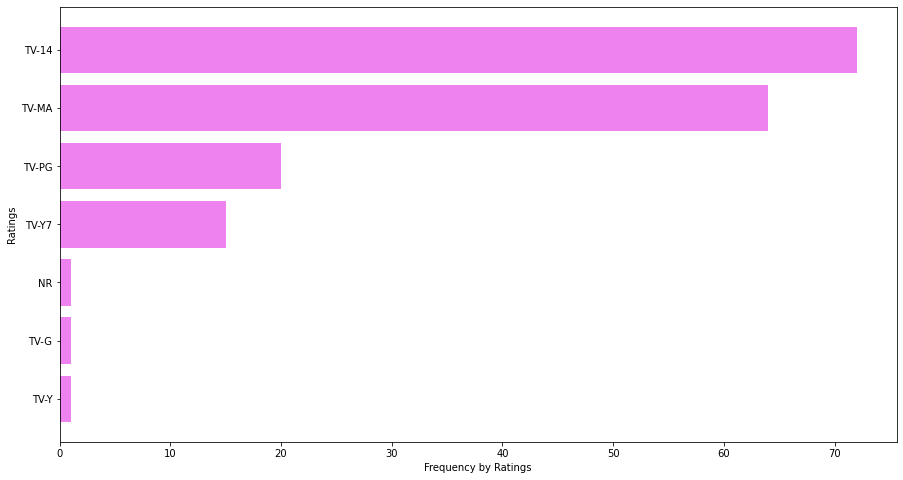

In [147]:
df_rating=df_japan_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes TV-14 Mature Audiences in TV Shows 

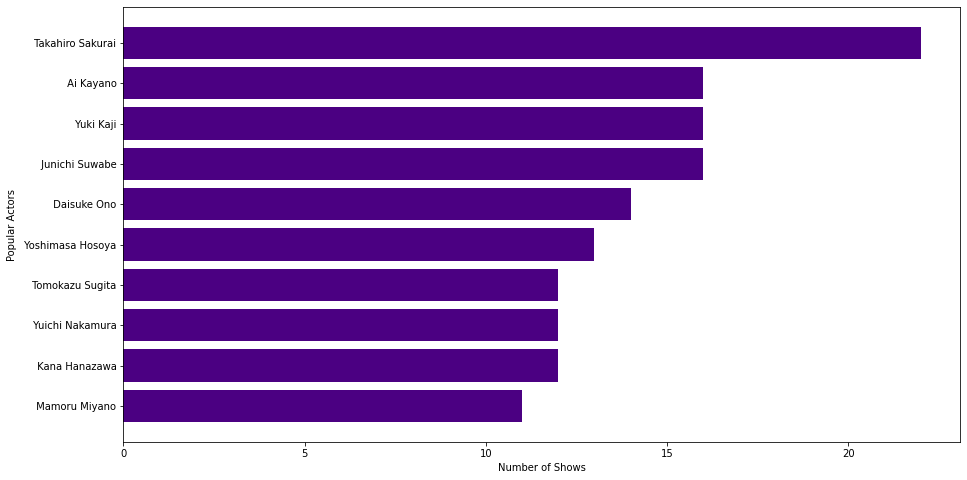

In [148]:
df_actors=df_japan_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [149]:
df_actors['Actors'].values

array([' Takahiro Sakurai', ' Ai Kayano', ' Yuki Kaji', ' Junichi Suwabe',
       ' Daisuke Ono', ' Yoshimasa Hosoya', ' Tomokazu Sugita',
       ' Yuichi Nakamura', ' Kana Hanazawa', ' Mamoru Miyano'],
      dtype=object)

In [152]:
df_directors['Directors'].values

array(['Go Koga', 'Hayato Date', 'Hiroyuki Seshita', 'Kazuya Murata',
       'Kobun Shizuno', 'Masaaki Yuasa', 'Sion Sono', 'Takuya Igarashi',
       'Tensai Okamura'], dtype=object)

**All Directors are one time directors only**

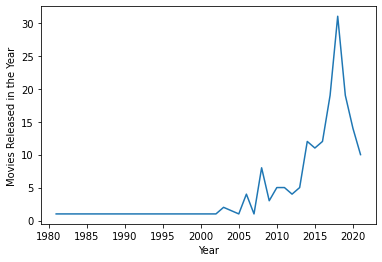

In [154]:
df_year=df_japan_shows.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In Japan, TV Shows have diminished in 2017 from 2016 and then increased till 2020 after which it has reduced in 2021.

In [156]:
pip install nbconvert[webpdf]

     -------------------------------------- 83.4/83.4 kB 137.5 kB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 836.7 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [157]:
jupyter nbconvert --to webpdf --allow-chromium-download your-notebook-file.ipynb

SyntaxError: invalid syntax (514470026.py, line 1)